In [15]:
!pip install scikit-image


  Obtaining dependency information for scikit-image from https://files.pythonhosted.org/packages/ce/d0/a3f60c9f57ed295b3076e4acdb29a37bbd8823452562ab2ad51b03d6f377/scikit_image-0.22.0-cp311-cp311-win_amd64.whl.metadata
  Using cached networkx-3.1-py3-none-any.whl (2.1 MB)
  Obtaining dependency information for imageio>=2.27 from https://files.pythonhosted.org/packages/f6/37/e21e6f38b93878ba80302e95b8ccd4718d80f0c53055ccae343e606b1e2d/imageio-2.31.5-py3-none-any.whl.metadata
  Obtaining dependency information for tifffile>=2022.8.12 from https://files.pythonhosted.org/packages/f5/72/68ea763b5f3e3d9871492683059ed4724fd700dbe54aa03cdda7a9692129/tifffile-2023.9.26-py3-none-any.whl.metadata
  Obtaining dependency information for lazy_loader>=0.3 from https://files.pythonhosted.org/packages/a1/c3/65b3814e155836acacf720e5be3b5757130346670ac454fee29d3eda1381/lazy_loader-0.3-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/24.5 MB ? eta -:--:--
   ----------------------

In [3]:
!pip install opencv-python

  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/38/d2/3e8c13ffc37ca5ebc6f382b242b44acb43eb489042e1728407ac3904e72f/opencv_python-4.8.1.78-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
   ---------------------------------------- 0.3/38.1 MB 10.2 MB/s eta 0:00:04
    --------------------------------------- 0.8/38.1 MB 9.7 MB/s eta 0:00:04
   - -------------------------------------- 1.3/38.1 MB 10.3 MB/s eta 0:00:04
   - -------------------------------------- 1.9/38.1 MB 10.7 MB/s eta 0:00:04
   -- ------------------------------------- 2.4/38.1 MB 11.0 MB/s eta 0:00:04
   --- ------------------------------------ 3.0/38.1 MB 11.2 MB/s eta 0:00:04
   --- ------------------------------------ 3.5/38.1 MB 11.3 MB/s eta 0:00:04
   ---- ----------------------------------- 4.1/38.1 MB 11.3 MB/s eta 0:00:04
   ---- ----------------------------------- 4.6/38.1 MB 11.4 MB/s eta 0:00:03
   -----

In [4]:
import cv2
import numpy as np

# Load the image
input_image_path = 'dummy_bubble.png'
output_image_path = 'output_image.jpg'

# Read the image
image = cv2.imread(input_image_path)

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise and improve edge detection
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Use Hough Circle Transform to detect circles in the image
circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, dp=1, minDist=50, param1=100, param2=30, minRadius=20, maxRadius=100)

# Ensure circles were detected
if circles is not None:
    circles = np.uint16(np.around(circles))

    # Draw bounding boxes around the detected circles
    for circle in circles[0, :]:
        center_x, center_y, radius = circle
        # Convert circle to a bounding box (rectangle)
        x1, y1 = center_x - radius, center_y - radius
        x2, y2 = center_x + radius, center_y + radius
        # Draw the bounding box
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Save the output image with bounding boxes
cv2.imwrite(output_image_path, image)

# Display the output image (optional)
cv2.imshow('Bounding Boxes', image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [8]:
import cv2
import numpy as np

# Load the image
input_image_path = 'dummy_bubble.png'
output_image_path = 'output_image.jpg'

# Read the image
image = cv2.imread(input_image_path)

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise and improve edge detection
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Use Canny edge detection to find edges in the image
edges = cv2.Canny(blurred, threshold1=30, threshold2=100)

# Find contours in the edge-detected image
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw bounding boxes around circles and ellipses
for contour in contours:
    # Approximate the contour with a polygon
    epsilon = 0.02 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)

    # Get the number of sides of the polygon (should be either 4 for rectangles or more for ellipses)
    sides = len(approx)

    if sides >= 4:
        # Fit an ellipse around the contour
        ellipse = cv2.fitEllipse(contour)

        # Draw a bounding box around the ellipse
        cv2.ellipse(image, ellipse, (0, 255, 0), 2)

# Save the output image with bounding boxes
cv2.imwrite(output_image_path, image)

# Display the output image (optional)
cv2.imshow('Bounding Boxes', image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [14]:
import cv2
import numpy as np

# Load the image
input_image_path = 'dummy_bubble.png'
output_image_path = 'output_image.jpg'

# Read the image
image = cv2.imread(input_image_path)

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise and improve edge detection
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Use Canny edge detection to find edges in the image
edges = cv2.Canny(blurred, threshold1=30, threshold2=100)

# Find contours in the edge-detected image
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw bounding boxes around contours
for contour in contours:
    # Get the coordinates of the bounding box
    x, y, w, h = cv2.boundingRect(contour)

    # Draw a bounding box around the contour
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Save the output image with bounding boxes
cv2.imwrite(output_image_path, image)

# Display the output image (optional)
cv2.imshow('Bounding Boxes', image)
cv2.waitKey(0)
cv2.destroyAllWindows()


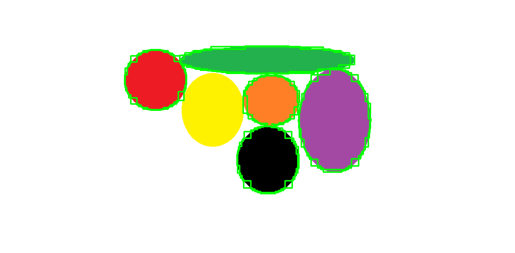

In [16]:
import cv2
from skimage import io, color, feature, measure
import matplotlib.pyplot as plt

# Load the image
input_image_path = 'dummy_bubble.png'
output_image_path = 'output_image.jpg'

# Read the image using skimage
image = io.imread(input_image_path)

# Convert the image to grayscale
gray = color.rgb2gray(image)

# Apply Canny edge detection to find edges
edges = feature.canny(gray, sigma=2)

# Find contours in the edge-detected image
contours = measure.find_contours(edges, 0.5)

# Create a copy of the original image to draw bounding boxes
output_image = image.copy()

# Draw bounding boxes around contours
for contour in contours:
    min_row, min_col = np.min(contour, axis=0)
    max_row, max_col = np.max(contour, axis=0)
    
    # Draw a bounding box around the contour
    cv2.rectangle(output_image, (int(min_col), int(min_row)), (int(max_col), int(max_row)), (0, 255, 0), 2)

# Save the output image with bounding boxes
io.imsave(output_image_path, output_image)

# Display the output image (optional)
plt.imshow(output_image)
plt.axis('off')
plt.show()


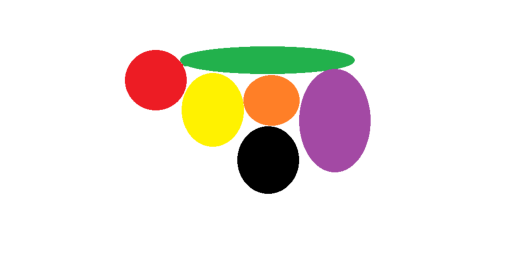

In [18]:
import cv2
from skimage import io, color, feature, measure
import matplotlib.pyplot as plt
import numpy as np

# Load the image
input_image_path = 'dummy_bubble.png'
output_image_path = 'output_image.jpg'

# Read the image using skimage
image = io.imread(input_image_path)

# Convert the image to grayscale
gray = color.rgb2gray(image)

# Apply Canny edge detection to find edges
edges = feature.canny(gray, sigma=2)

# Find contours in the edge-detected image
contours = measure.find_contours(edges, 0.5)

# Create a copy of the original image to draw bounding boxes
output_image = image.copy()

# Define the colors you want to find (in RGB format)
colors_to_find = [(34, 177, 76), (237, 27, 36), (163, 73, 163)]  # Red, Green, Blue

# Initialize a list to keep track of which colors have been found
found_colors = []

# Iterate over the contours
for contour in contours:
    min_row, min_col = np.min(contour, axis=0)
    max_row, max_col = np.max(contour, axis=0)

    # Extract a region of interest (ROI) from the original image
    roi = image[int(min_row):int(max_row), int(min_col):int(max_col)]

    # Calculate the mean color of the ROI
    mean_color = np.mean(roi, axis=(0, 1))

    # Check if the mean_color is close to any of the specified colors
    for specified_color in colors_to_find:
        color_difference = np.linalg.norm(mean_color - specified_color)
        if color_difference < 50:  # Adjust the threshold as needed
            # Draw a bounding box around the contour
            cv2.rectangle(output_image, (int(min_col), int(min_row)), (int(max_col), int(max_row)), specified_color, 2)
            found_colors.append(specified_color)

    # If all specified colors have been found, exit the loop
    if len(found_colors) == len(colors_to_find):
        break

# Save the output image with bounding boxes
io.imsave(output_image_path, output_image)

# Display the output image (optional)
plt.imshow(output_image)
plt.axis('off')
plt.show()


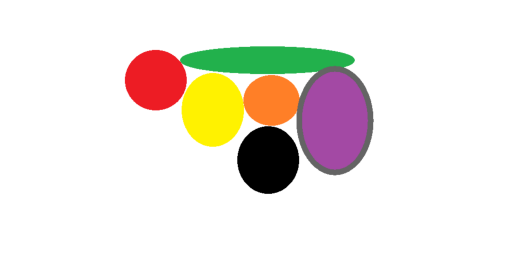

In [12]:
import cv2
from skimage import io, feature, color
import matplotlib.pyplot as plt
import numpy as np

def find_and_draw_bounding_boxes(input_image_path, output_image_path, color_rgb):
    # Read the image using skimage
    image = io.imread(input_image_path)

    # Create a mask to filter out pixels of the target color
    lower_bound = np.array([color_rgb[2] - 20, color_rgb[1] - 20, color_rgb[0] - 20], dtype=np.uint8)
    upper_bound = np.array([color_rgb[2] + 20, color_rgb[1] + 20, color_rgb[0] + 20], dtype=np.uint8)
    mask = cv2.inRange(image, lower_bound, upper_bound)

    # Apply Canny edge detection to find edges within the mask
    edges = feature.canny(mask, sigma=2)

    # Convert the edges image to binary format
    edges = (edges * 255).astype(np.uint8)

    # Find contours in the binary edge-detected image within the mask
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Create a copy of the original image to draw bounding boxes
    output_image = image.copy()

    for contour in contours:
        if len(contour) >= 5:
            # Fit an ellipse to the contour
            ellipse = cv2.fitEllipse(contour)
            
            # Draw the bounding box (ellipse) in the input color
            cv2.ellipse(output_image, ellipse, (100,100,100), 10)

    # Save the output image with bounding boxes
    io.imsave(output_image_path, output_image)

    # Display the output image (optional)
    plt.imshow(output_image)
    plt.axis('off')
    plt.show()

# Example usage:
input_image_path = 'dummy_bubble.png'
output_image_path = 'output_image.jpg'
target_color = (163, 73, 163)  # RGB color tuple, e.g., red

find_and_draw_bounding_boxes(input_image_path, output_image_path, target_color)


outside Loop


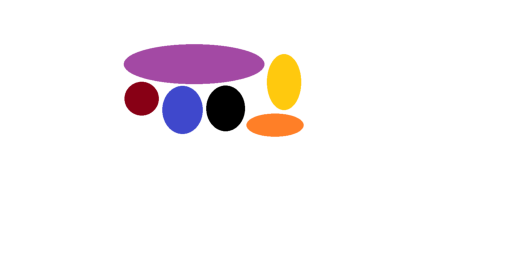

In [36]:
import cv2
from skimage import io, feature, color
import matplotlib.pyplot as plt
import numpy as np

def find_and_draw_bounding_boxes(input_image_path, output_image_path, color_rgb):
    # Read the image using skimage
    image = io.imread(input_image_path)

    # Create a mask to filter out pixels of the target color
    lower_bound = np.array([color_rgb[2] - 0, color_rgb[1] - 0, color_rgb[0] - 0], dtype=np.uint8)
    upper_bound = np.array([color_rgb[2] + 0, color_rgb[1] + 0, color_rgb[0] + 0], dtype=np.uint8)
    mask = cv2.inRange(image, lower_bound, upper_bound)

    # Apply Canny edge detection to find edges within the mask
    edges = feature.canny(mask, sigma=2)

    # Convert the edges image to binary format
    edges = (edges * 255).astype(np.uint8)

    # Find contours in the binary edge-detected image within the mask
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Create a copy of the original image to draw bounding boxes
    output_image = image.copy()
    print("outside Loop")
    for contour in contours:
        print("inside_loop")
        
        if len(contour) >= 0:
            # Fit an ellipse to the contour
            ellipse = cv2.fitEllipse(contour)

            # Draw the bounding box (ellipse) in the input color
            cv2.ellipse(output_image, ellipse, (100, 100, 100), 10)

            # Get the major and minor axes of the ellipse
            major_axis = max(ellipse[1])
            minor_axis = min(ellipse[1])

            # Calculate the area of the ellipse

            area=minor_axis*major_axis
            # Print the length, width, and area of the bounding box in terms of pixels
            print(f"Length of bounding box: {major_axis:.2f} pixels")
            print(f"Width of bounding box: {minor_axis:.2f} pixels")
            print(f"Area of ellipse: {area:.2f} square pixels")

    # Save the output image with bounding boxes
    io.imsave(output_image_path, output_image)

    # Display the output image (optional)
    plt.imshow(output_image)
    plt.axis('off')
    plt.show()

# Example usage:
input_image_path = 'color_dummy_bubble.png'
output_image_path = 'output_image1.jpg'
# target_color = (163, 73, 163)  # RGB color tuple, e.g., red
# target_color=(237, 27, 36) # works
target_color=(255,201,14) #yellow
target_color=(136,0,21) #purple
target_color=(0,0,0) #black works
# target_color=(255,127,39) # orange 

find_and_draw_bounding_boxes(input_image_path, output_image_path, target_color)
